# Part 1: Reading Files and Inspecting Data
## Washington DC Taxi Data Exploratory Analysis

Created by Joshua Malamud

# Table of Contents

Download Taxi Data

1. Importing Libraries

2. Clearing Local Data from Previous Work

3. Reading in Data from Local Folder

    * Unzipping and reading in data as CSVs to local folder

    * 

5. Conclusion

In [10]:
# import libraries
import os
from pathlib import Path
import pandas as pd 
import urllib
import json
import zipfile
from zipfile import ZipFile
import glob
import seaborn as sns
from openpyxl import Workbook
import matplotlib.pyplot as plt


In [11]:
# clear folder from previous exercises leaving only trip data zip file
dir_name = r"C:\Users\Guest.Guest\OneDrive - Government of The District of Columbia\Documents\Projects_JM\Python\Projects\taxi_analysis\data"
#################################################################################### replace local link with r"C:\local-download-folder-path"
folder = os.listdir(dir_name)

for item in folder:
    if item.endswith(".csv") or item.endswith(".txt"):
        os.remove(os.path.join(dir_name, item))

In [12]:
# assign path to data folder
data_path = r"C:\Users\Guest.Guest\OneDrive - Government of The District of Columbia\Documents\Projects_JM\Python\Projects\taxi_analysis\data"

# file name to download
file = "OpenDataDC_Taxi_2023.zip"

# establish file path
fullfilename = os.path.join(data_path, file)

# assign ZIP file to variable
items = zipfile.ZipFile(fullfilename)

# show files in ZIP
print(items.namelist())

# open ZIP file in read mode and extract all files inside the ZIP file
with zipfile.ZipFile(fullfilename, "r") as file:
    file.extractall(data_path)

['README_DC_Taxicab_trip.txt', 'taxi_202301.csv', 'taxi_202302.csv', 'taxi_202303.csv', 'taxi_202304.csv', 'taxi_202305.csv', 'taxi_202306.csv', 'taxi_202307.csv', 'taxi_202308.csv', 'taxi_202309.csv', 'taxi_202310.csv', 'taxi_202311.csv', 'taxi_202312.csv']


In [ ]:
# load monthly files into a single df and visualize process using glob library
all_dfs = []
for one_filename in glob.glob(r'C:\Users\Guest.Guest\OneDrive - Government of The District of Columbia\Documents\Projects_JM\Python\Projects\taxi_analysis\data\taxi*.csv'):
    print(f'Loading {one_filename}')
    new_df= pd.read_csv(one_filename,
# select columns necessary for analysis to consolidate df
                 usecols=['OBJECTID', 'ORIGINDATETIME_TR', 'DESTINATIONDATETIME_TR', 'ORIGINZIP', 'DESTINATIONZIP', 'MILEAGE', 'DURATION', 'FAREAMOUNT', 'ORIGIN_BLOCK_LATITUDE', 'ORIGIN_BLOCK_LONGITUDE', 'ORIGINZIP']) 
    all_dfs.append(new_df)

len(all_dfs)

Loading C:\Users\Guest.Guest\OneDrive - Government of The District of Columbia\Documents\Projects_JM\Python\Projects\taxi_analysis\data\taxi_202301.csv
Loading C:\Users\Guest.Guest\OneDrive - Government of The District of Columbia\Documents\Projects_JM\Python\Projects\taxi_analysis\data\taxi_202302.csv
Loading C:\Users\Guest.Guest\OneDrive - Government of The District of Columbia\Documents\Projects_JM\Python\Projects\taxi_analysis\data\taxi_202303.csv
Loading C:\Users\Guest.Guest\OneDrive - Government of The District of Columbia\Documents\Projects_JM\Python\Projects\taxi_analysis\data\taxi_202304.csv
Loading C:\Users\Guest.Guest\OneDrive - Government of The District of Columbia\Documents\Projects_JM\Python\Projects\taxi_analysis\data\taxi_202305.csv
Loading C:\Users\Guest.Guest\OneDrive - Government of The District of Columbia\Documents\Projects_JM\Python\Projects\taxi_analysis\data\taxi_202306.csv
Loading C:\Users\Guest.Guest\OneDrive - Government of The District of Columbia\Documents

12

In [14]:
# combine multiple dataframes into one and preview data
taxi_trips = pd.concat(all_dfs)

rows, columns = taxi_trips.shape
print('rows: {:,}\ncolumns: {}'.format(rows, columns))

taxi_trips

rows: 3,092,555
columns: 7


,OBJECTID,ORIGINZIP,DESTINATIONZIP,MILEAGE,DURATION,ORIGINDATETIME_TR,DESTINATIONDATETIME_TR
0,1,2DA,22202,5.76000,852.0,01/01/2023 00:00,01/01/2023 00:00
1,2,20011,20011,3.11000,650.0,01/01/2023 00:00,01/01/2023 00:00
2,3,20001,20007,4.80000,539.0,01/01/2023 00:00,01/01/2023 00:00
3,4,20005,20024,2.68000,1187.0,01/01/2023 00:00,01/01/2023 00:00
4,5,20001,20002,5.76000,876.0,01/01/2023 00:00,01/01/2023 00:00
...,...,...,...,...,...,...,...
199303,199304,20004,20011,9.63000,3024.0,12/31/2023 23:00,01/01/2024 00:00
199304,199305,20002,20002,0.00000,106.0,12/31/2023 23:00,12/31/2023 23:00
199305,199306,20002,20037,2.73000,1078.0,12/31/2023 23:00,12/31/2023 23:00
199306,199307,20002,20010,3.54000,1269.0,12/31/2023 23:00,01/01/2024 00:00


OBJECTID                  0.000000
ORIGINZIP                 0.000000
DESTINATIONZIP            0.000000
MILEAGE                   0.000000
DURATION                  0.000776
ORIGINDATETIME_TR         0.000000
DESTINATIONDATETIME_TR    0.000000
dtype: float64


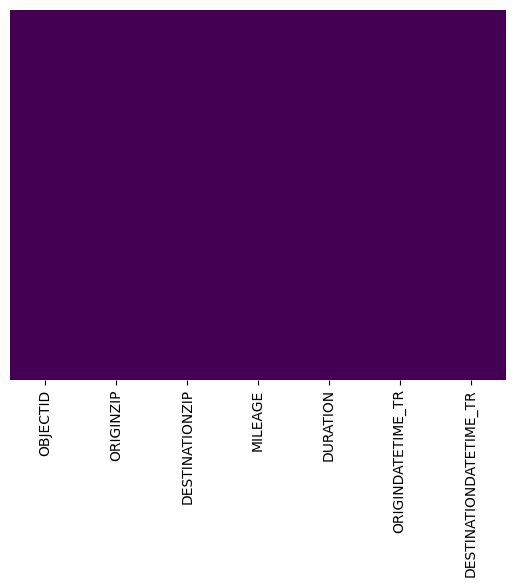

In [15]:
# find missing values, shown as percentage
sns.heatmap(taxi_trips.isnull(), yticklabels=False, cbar=False, cmap="viridis")
# visualize missing values as heatmap to show where nulls fall througout date range
print((taxi_trips.isnull().sum() / len(taxi_trips.index)) * 100)

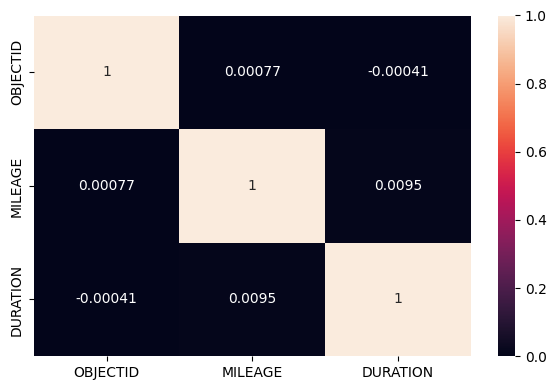

In [16]:
# display field correlation as heat map and display blank cell if all column values are null
fig, ax = plt.subplots(figsize=(6, 4))

sns.heatmap(
    taxi_trips.corr(numeric_only=True), 
    annot=True, 
    ax=ax
)

plt.tight_layout()